Author: Logan Fickling, May 2018

## Purpose of this notebook: 
The purpose of this notebook is to outline the relevant code in RetrievalCreationHelper.py in a way that allows a user to easily use the code. Specifically we will cover:

## A) What's in the script?
## B) How do I use the code, and what are the relevant parameters?
## C) How does the algorithm work?
## D) Example of each step of the algorithm


### Goal of the Script:
The overarching goal of this script is to allow the user to get any Computational Memory Lab's subject's behavioral events (regardless of the experiment and its arbitrary formatting) and from these determine both "included" recalls (i.e. recalls sufficiently seperated from other events) and matched points in time (also sufficiently seperated from other events) where the subject is unsuccessfully trying to recall (deliberation). After this, the script will return a behavioral event array (ready and formatted properly for loading into ptsa's EEGReader) containing included matched recalls and their corresponding deliberation periods.

# A) What's in the script?
RetrievalCreationHelper.py is composed of three main parts: 

#### RetrievalEventCreator: 
An object used to ensure the subject's behavioral events are formatted correctly. The user really doesn't need to access this object, but can do so if they so please. 

#### DeliberationEventCreator: 
An object used to create included recalls and their appropriated matched deliberations, this object is a subclass of RetrievalEventCreator and the center piece of how the script works.

#### create_matched_events: 
A helper function simply for convenience of the user. This function is simply a wrapper around an newly instantiated instance of DeliberationEventCreator for users who do not desire to use object oriented programming.

## B) How do I use the code, and what are the relevant parameters?

### B1) Installing the code from github:
In order to use the code, first the user must get install it from github, repo at: https://github.com/LoganJF/CML_lib

That is to say, run the following in the terminal:

mkdir CML_lib

cd CML_lib

git clone https://github.com/LoganJF/CML_lib.git .

### B2) Import the relevant code from the package

In [1]:
# General imports
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


import sys
sys.path.append('/home2/loganf/SecondYear/CML_lib') # Path to wherever package is
# import statements
from RetrievalCreationHelper import (create_matched_events, 
                                     DeliberationEventCreator, 
                                     RetrievalEventCreator)

### B3) What are the relevant parameters?

In [2]:
help(create_matched_events) # If you prefer functions

Help on function create_matched_events in module RetrievalCreationHelper:

create_matched_events(subject, experiment, session, rec_inclusion_before, rec_inclusion_after, recall_eeg_start, recall_eeg_end, match_tolerance, remove_before_recall, remove_after_recall, desired_duration=None, verbose=False, goodness_fit_check=False)
    Creates behavioral events for recall and matched-in-time deliberation points
    
    Parameters
    ----------
    :subject:
            str; subject id, e.g. 'R1111M'
    :experiment:
        str, experiment id, e.g. 'FR1'
        valid intracranial experiments:
            ['FR1', 'FR2', 'FR3', 'FR5', 'FR6', 'PAL1', 'PAL2', 'PAL3', 'PAL5',
             'PS1', 'PS2', 'PS2.1', 'PS3', 'PS4_FR', 'PS4_catFR', 'PS5_catFR',
             'TH1', 'TH3', 'THR', 'THR1', 'YC1', 'YC2', 'catFR1', 'catFR2',
             'catFR3', 'catFR5', 'catFR6', 'pyFR']
        valid scalp experiments:
            ['ltpFR2']
    :session:
        int, session to analyze
    :rec_inclus

In [3]:
help(DeliberationEventCreator) # If you prefer objects

Help on class DeliberationEventCreator in module RetrievalCreationHelper:

class DeliberationEventCreator(RetrievalEventCreator)
 |  An object used to create recall behavioral events that are formatted in a consistent way regardless of the CML
 |  experiment.
 |  
 |  PARAMETERS
 |  -------
 |  INPUTS:
 |      :subject:
 |          str; subject id, e.g. 'R1111M'
 |      :experiment:
 |          str, experiment id, e.g. 'FR1'
 |          valid intracranial experiments:
 |              ['FR1', 'FR2', 'FR3', 'FR5', 'FR6', 'PAL1', 'PAL2', 'PAL3', 'PAL5',
 |               'PS1', 'PS2', 'PS2.1', 'PS3', 'PS4_FR', 'PS4_catFR', 'PS5_catFR',
 |               'TH1', 'TH3', 'THR', 'THR1', 'YC1', 'YC2', 'catFR1', 'catFR2',
 |               'catFR3', 'catFR5', 'catFR6', 'pyFR']
 |          valid scalp experiments:
 |              ['ltpFR2']
 |      :session:
 |          int, session to analyze
 |      :rec_inclusion_before:
 |          int, time in ms before each recall that must be free from other 

### B4) Example Usage (Demo of convenience function)

In [4]:
# Printing out the steps the code takes
events = create_matched_events(subject='R1111M', experiment='FR1', session=0,
                                   rec_inclusion_before = 2000, rec_inclusion_after = 1000,
                                   remove_before_recall = 2000, remove_after_recall = 2000,
                                   recall_eeg_start = -1250, recall_eeg_end = 250,
                                   match_tolerance = 2000, verbose=True)
events[:5]

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 43.4027777778%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Set attribute included_recalls
('No recall period detected, trial: ', 25)
Starting Exact Matching Procedure...
Could not perfectly match recall index 0
Could not perfectly match recall index 1
Could not perfectly match recall index 2
Could not perfectly match recall index 3
Could not perfectly match recall index 4
Could not perfectly match recall index 5
Could not perfectly match recall index 8
Could not perfectly match recall index 9
Could not perfectly match recall index 10
Could not perfectly match recall index 13
Could not perfectly match recall index 15
Could not perfectly match recall index 17
Could not perfectly match recall index 22
Could not perfectly match recall

rec.array([ (0, 135459, u'r1', 0, u'TOY', -999, 15086, [], 1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0,  277, 1453499365206, 0, u'REC_WORD', u'1.05', 0, 7204, 14923),
           (0, 186616, u'r1', 0, u'N/A', -999, 15086, [], 2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, -999, 1453499467526, 0, u'REC_BASE', u'1.05', 0, -999,  -999),
           (0, 129347, u'r1', 0, u'N/A', -999,  2863, [], 1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, -999, 1453499352983, 0, u'REC_BASE', u'1.05', 1, -999,  -999),
           (0, 180505, u'r1', 0, u'DEER', -999,  2863, [], 2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/nor

In [5]:
# Not printing out the steps the code takes
events = create_matched_events(subject='R1293P', experiment='FR1', session=3,
                                   rec_inclusion_before = 2000, rec_inclusion_after = 1000,
                                   remove_before_recall = 2000, remove_after_recall = 2000,
                                   recall_eeg_start = -1250, recall_eeg_end = 250,
                                   match_tolerance = 2000, verbose=False)
events[:5]

rec.array([ (u'r1', -999, 3, 0, u'R1293P', -999, u'N/A',  7004, 5, 0, 1492269225243, u'REC_BASE', 3162576, u'FR1', -999, 1, [], u'NON-STIM', 0, u'0.0', 17, -999, u'/protocols/r1/subjects/R1293P/experiments/FR1/sessions/3/ephys/current_processed/noreref/R1293P_FR1_3_15Apr17_1129', 20, -999, u'1.0.0', 0, -999,  -999),
           (u'r1',   63, 3, 0, u'R1293P', -999, u'CORN',  7004, 5, 0, 1492267315665, u'REC_WORD', 1253097, u'FR1', -999, 1, [], u'NON-STIM', 0, u'0.0',  1, -999, u'/protocols/r1/subjects/R1293P/experiments/FR1/sessions/3/ephys/current_processed/noreref/R1293P_FR1_3_15Apr17_1129', 20, -999, u'1.0.0', 0, 3065,  1385),
           (u'r1', -999, 3, 0, u'R1293P', -999, u'N/A', 12294, 9, 0, 1492268064162, u'REC_BASE', 2001556, u'FR1', -999, 1, [], u'NON-STIM', 0, u'0.0',  8, -999, u'/protocols/r1/subjects/R1293P/experiments/FR1/sessions/3/ephys/current_processed/noreref/R1293P_FR1_3_15Apr17_1129', 20, -999, u'1.0.0', 1, -999,  -999),
           (u'r1',  270, 3, 0, u'R1293P', -999,

Code could not successfully match recall index 9, dropping recall index 9
Code could not successfully match recall index 11, dropping recall index 11
Code could not successfully match recall index 13, dropping recall index 13
Code could not successfully match recall index 15, dropping recall index 15
Code could not successfully match recall index 18, dropping recall index 18
('Kolmogorov-Smirnov statistic: ', Ks_2sampResult(statistic=0.14285714285714288, pvalue=0.83886105643585673))

Mean recall time (ms) = 10428.1714286
Mean deliberation time (ms) = 10160.6285714
Mean difference in time (ms) = 267.542857143
1). How many Recalls are excluded due to match failure?

87.5% of 40 included recalls were successfully matched

2). How close does the distribution of Deliberation times match distribution of Recall times?



,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Included Recalls,3270,23102,9226,24795,2176,21010,28072,7880,3149,3738,...,8072,8785,3354,5714,9006,2880,9064,12685,2624,20363
Deliberation,3270,23102,9226,24795,2176,21010,28072,7880,1250,1738,...,8072,8785,1354,5714,9538,2880,9064,12685,2624,20363


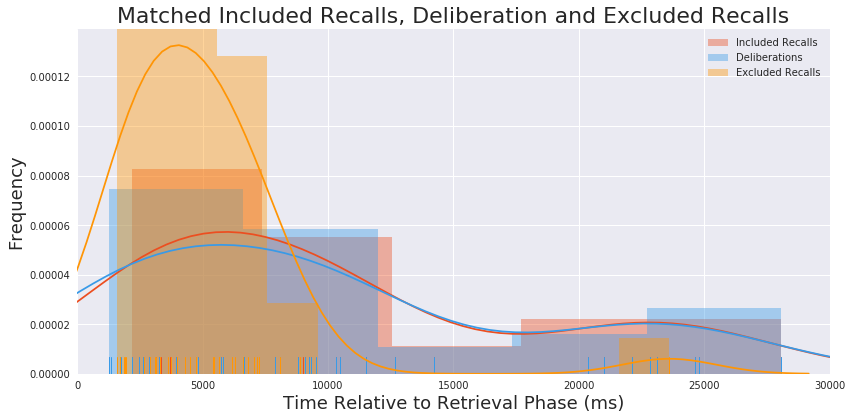

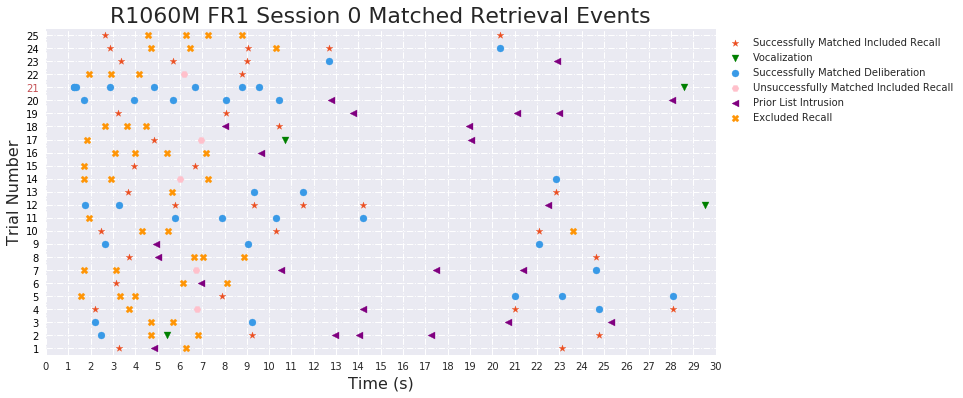

rec.array([ (0, 207172, u'r1', 0, u'DUCK', -999,  3270, [],  1, u'R1060M', u'/protocols/r1/subjects/R1060M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1060M_FR1_0_25Jul15_1018', u'0.0', u'FR1', 1, 20, 0,   82, 1437834607618, 0, u'REC_WORD', u'1.05', 0,  3270, 1589),
           (0, 953655, u'r1', 0, u'N/A', -999,  3270, [], 12, u'R1060M', u'/protocols/r1/subjects/R1060M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1060M_FR1_0_25Jul15_1018', u'0.0', u'FR1', 1, 20, 0, -999, 1437836100669, 0, u'REC_BASE', u'1.05', 0,  -999, -999),
           (0, 217087, u'r1', 0, u'BEAN', -999, 23102, [],  1, u'R1060M', u'/protocols/r1/subjects/R1060M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1060M_FR1_0_25Jul15_1018', u'0.0', u'FR1', 1, 20, 0,   16, 1437834627450, 0, u'REC_WORD', u'1.05', 1, 16814, 6907),
           (0, 469670, u'r1', 0, u'N/A', -999, 23102, [],  5, u'R1060M', u'/protocols/r1/subjects/R1060M/experiments/FR1/sessions/0/ephys/current_processe

In [6]:
# Not printing out the steps the code takes, but displaying goodness of fit information
events = create_matched_events(subject='R1060M', experiment='FR1', session=0,
                                   rec_inclusion_before = 2000, rec_inclusion_after = 1000,
                                   remove_before_recall = 2000, remove_after_recall = 2000,
                                   recall_eeg_start = -1250, recall_eeg_end = 250,
                                   match_tolerance = 2000, verbose=False, goodness_fit_check=True)
events[:5]

# C) Conceptual Steps of the script:
### 1) Check if the subject has behavioral events that are correctly formatted for the code, if they do not then apply the necessary steps to fix it's formating (Handled by RetrievalEventCreator)
### 2) Use the user's inputted parameters (rec_inclusion_before, rec_inclusion_after) to determine which recalls are excluded/included (Handled by RetrievalEventCreator)
### 3) Construct an array (shape=(number of trials, ms of recall period)) of 1's and 0's, where 1 is a valid possible deliberation point and 0 is not. This is done by removing periods of vocalization/recall as specified from the inputted parameters (remove_before_recall, remove_after_recall) (Handled by DeliberationEventCreator)
### 4) Iterate through each included recall and count the number of exact matches, order recalls from number of least to most exact matches (Handled by DeliberationEventCreator)
### 5) Iterate through each recall from least to most exact matches, find exact deliberation matches and remove them as a possibly valid time period (Handled by DeliberationEventCreator)
### 6) Iterate through each unmatched recall (from least to most exact matches) and find deliberation matches within the user specified match_tolerance parameter (Handled by DeliberationEventCreator)
### 7) Construct an array of behavioral events from the matches, remove any included recalls that were not matched, and return only matched included recalls and their matched deliberation period (Handled by DeliberationEventCreator)

# D) Stepping through the code!

In [7]:
# ---------> Example parameters
subject = 'R1111M' # Subject ID
experiment = 'FR1'# Experiment ID
session = 0 # Session
rec_inclusion_before = 2000 # Time before a recall that must be free (ms)
rec_inclusion_after = 1000 # Time after recall that must be free (ms)
remove_before_recall = 2000 # Time to remove (ms) before each recall as a valid deliberation point
remove_after_recall = 1500 # Time to remove (ms) after each recall as a valid deliberation point
recall_eeg_start = -1250 # Time in ms relative to vocalization we'll start loading eeg at
recall_eeg_end = 250 # Time in ms relative to vocalization we'll stop loading eeg at
"""Time in ms relative to retrieval (e.g. recall_eeg_start to zero) 
that a match can deviate by while still counting as a valid match
e.g. here it would be from -3250: 2000 NOT until 2250. Rationale here
is that we're trying to match to retrieval and not vocalization"""
match_tolerance = 2000 
verbose = True # Print out what the code does

# Create an instance of the object
ram_subject = DeliberationEventCreator(subject, experiment, session, 
                                       rec_inclusion_before, rec_inclusion_after, 
                                       recall_eeg_start, recall_eeg_end, match_tolerance,
                                       remove_before_recall, remove_after_recall,
                                       verbose=True)

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 43.4027777778%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Set attribute included_recalls


### As we can see, when we create an instance of DeliberationEventCreator a couple things happens. 

First, we can notice that several attributes are set such as: possible_sessions, event_path, events (which gets the fields 'match', 'timebefore' and 'timeafter' added to it), sample_rate, trials, and included_recalls. 

 
That is to say, upon instantiating an instance of DeliberationEventCreator, we've already accomplished steps 1 and 2 in our code!

In [8]:
ram_subject.included_recalls[:3] # Upon instantiating immediately accessable

rec.array([ (0, 135459, u'r1', 0, u'TOY', -999, 15086, [], 1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, 277, 1453499365206, 0, u'REC_WORD', u'1.05', 0, 7204, 14923),
           (0, 180505, u'r1', 0, u'DEER', -999,  2863, [], 2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0,  72, 1453499455303, 0, u'REC_WORD', u'1.05', 1, 2863,  1035),
           (0, 184110, u'r1', 0, u'SPRING', -999, 10074, [], 2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, 244, 1453499462514, 0, u'REC_WORD', u'1.05', 2, 3443, 15836)], 
          dtype=[('session', '<i8'), ('eegoffset', '<i8'), ('protocol', '<U256'), ('intrusion', '<i8'), ('item_name', '<U256'), ('serialpos', '<i8'), ('rect

### 3) Create an inital array of possible deliberation values using method set_valid_baseline_intervals

In [9]:
print(help(DeliberationEventCreator.set_valid_baseline_intervals))

Help on method set_valid_baseline_intervals in module RetrievalCreationHelper:

set_valid_baseline_intervals(self) unbound RetrievalCreationHelper.DeliberationEventCreator method
    Sets to attribute baseline_array an array of 1 and 0 (num_unique_trials x 30000) where 1 is a valid time point
    
    Parameters
    -----------
    INPUTS EXTRACTED FROM INSTANCE:
        behavioral_events: np.array, behavioral events of a subject for one session of data.
        recall_period: int, by default 30000,
            time in ms of recall period (scalp = 750000, pyFR = 450000, RAM = 300000)
        desired_bl_duration: int, by default 3000,
            the desired time in ms we want to match over (e.g. if looking at recall from -2000 to 0, this
            should be 2000)
        remove_before_recall: int, by default 1500,
            time in ms to exclude before each recall/vocalization as invalid
        remove_after_recall: int, by default 1500,
            time in ms to exclude after each

In [10]:
ram_subject.set_valid_baseline_intervals()
ram_subject.baseline_array

('No recall period detected, trial: ', 25)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Visualize the initial deliberation array

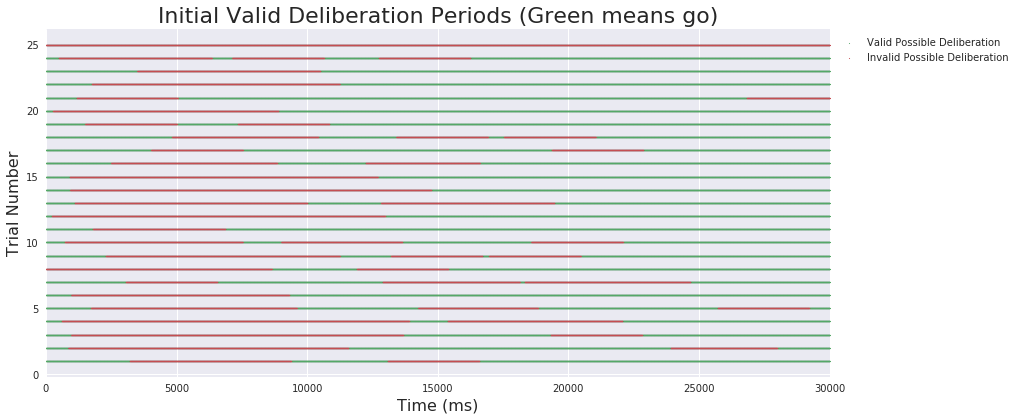

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

x_axis = np.arange(len(ram_subject.baseline_array[0]))
for i, trial_row in enumerate(ram_subject.baseline_array):
    invalid = np.where(trial_row==0)
    valid = np.where(trial_row==1)
    ax.scatter(x_axis[valid], np.zeros(len(valid[0]))+i+1, 
               c='g', s=.6, label='Valid Possible Deliberation')
    
    ax.scatter(x_axis[invalid], 
               np.zeros(len(invalid[0]))+i+1, 
               c='r',s=.6, label='Invalid Possible Deliberation')
    
# Make things pretty
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels): # Only show each legend once...
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
        
lgd = ax.legend(handle_list, label_list, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True)
plt.ylabel('Trial Number', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.title('Initial Valid Deliberation Periods (Green means go)', fontsize=22)
plt.xlim(x_axis[0], x_axis[-1])
plt.tight_layout()
plt.show()

### 4) Order Recalls by number of exact matches they have using method order_recalls_by_num_exact_matches

In [12]:
print(help(DeliberationEventCreator.order_recalls_by_num_exact_matches))

Help on method order_recalls_by_num_exact_matches in module RetrievalCreationHelper:

order_recalls_by_num_exact_matches(self) unbound RetrievalCreationHelper.DeliberationEventCreator method
    Orders included_recalls array by least to most number of exact matches to create attribute ordered_recalls
    Creates
    -------
    Attribute ordered_recalls
    
    Notes
    ---------
    ordered_recalls[0] has the least number of matches and ordered_recalls[-1] has the most

None


In [13]:
print(ram_subject.ordered_recalls)
ram_subject.order_recalls_by_num_exact_matches()
print(ram_subject.ordered_recalls[:5]) # Ordered most to least!

None
[ (0,  923906, u'r1', 0, u'FOOD', -999, 6094, [], 15, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, 100, 1453500942188, 0, u'REC_WORD', u'1.05', 33, 2655,  2759)
 (0,  648217, u'r1', 0, u'WORLD', -999, 6025, [], 10, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, 297, 1453500390779, 0, u'REC_WORD', u'1.05', 20, 2448,  4990)
 (0, 1033974, u'r1', 0, u'CORD', -999, 6033, [], 17, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0,  62, 1453501162336, 0, u'REC_WORD', u'1.05', 35, 6033, 15336)
 (0,  473385, u'r1', 0, u'BAG', -999, 5060, [],  7, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638'

### 5/6) Iterate through ordered recalls and get exactly matched deliberation points, if there are none get tolerated points using method match_accumlator

In [14]:
print(help(DeliberationEventCreator.match_accumulator))

Help on method match_accumulator in module RetrievalCreationHelper:

match_accumulator(self) unbound RetrievalCreationHelper.DeliberationEventCreator method
    Accumulates matches between included recalls and baseline array, upon selection of a match invalidates it for other recalls
    
    Code will first go through each recall (ordered from least to most number of matches)  and try to select an exact match in time
    in another trial/list. If it cannot, after completeion of all exact matches the code will go through and try to find a tolerated
    match, that is a period in time that is within the instance's match_tolrance relative to the retrieval phase (eeg_rec_start up
    until vocalization onset)
    
    Modifies
    --------
    Attribute baseline_array
    
    Sets
    ----
    Attribute matches

None


In [15]:
print(ram_subject.matches)
ram_subject.match_accumulator()
print(ram_subject.matches)

None
Starting Exact Matching Procedure...
Could not perfectly match recall index 0
Could not perfectly match recall index 1
Could not perfectly match recall index 2
Could not perfectly match recall index 3
Could not perfectly match recall index 4
Could not perfectly match recall index 7
Could not perfectly match recall index 8
Could not perfectly match recall index 12
Could not perfectly match recall index 15
Could not perfectly match recall index 16
Could not perfectly match recall index 19
Could not perfectly match recall index 21
Could not perfectly match recall index 22
Starting Tolerated Matching Procedure...
Could not match recall index 0
Could not match recall index 1
Could not match recall index 2
Could not match recall index 3
Could not match recall index 4
Could not match recall index 7
Could not match recall index 8
OrderedDict([(0, []), (1, []), (2, []), (3, []), (4, []), (5, [(21, 6124, 7624)]), (6, [(18, 3042, 4542)]), (7, []), (8, []), (9, [(7, 6603, 8103)]), (10, [(17, 

### Visual Verification that code removed the selections from the array

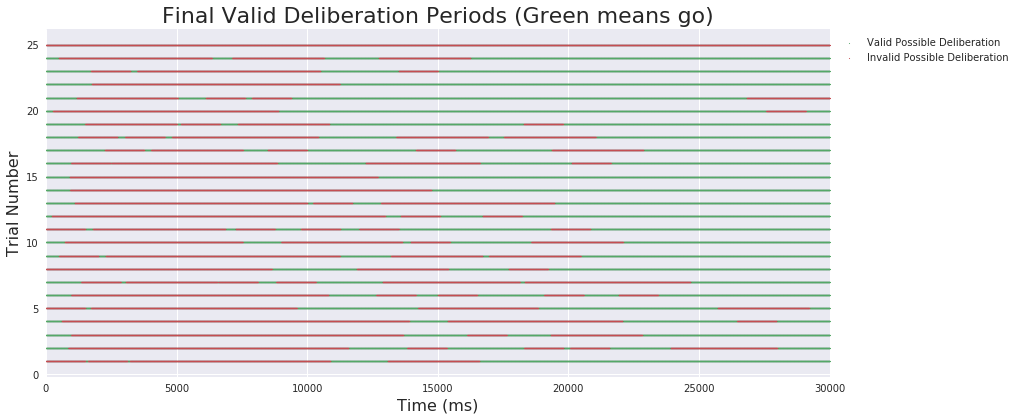

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

x_axis = np.arange(len(ram_subject.baseline_array[0]))
for i, trial_row in enumerate(ram_subject.baseline_array):
    invalid = np.where(trial_row==0)
    valid = np.where(trial_row==1)
    ax.scatter(x_axis[valid], np.zeros(len(valid[0]))+i+1, 
               c='g', s=.6, label='Valid Possible Deliberation')
    
    ax.scatter(x_axis[invalid], 
               np.zeros(len(invalid[0]))+i+1, 
               c='r',s=.6, label='Invalid Possible Deliberation')
    
# Make things pretty
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels): # Only show each legend once...
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
        
lgd = ax.legend(handle_list, label_list, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True)
plt.ylabel('Trial Number', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.title('Final Valid Deliberation Periods (Green means go)', fontsize=22)
plt.xlim(x_axis[0], x_axis[-1])
plt.tight_layout()
plt.show()

### 7) Construct an array of matched deliberation/included recalls using method 

In [17]:
ram_subject.create_matched_recarray()

Code could not successfully match recall index 0, dropping recall index 0
Code could not successfully match recall index 1, dropping recall index 1
Code could not successfully match recall index 2, dropping recall index 2
Code could not successfully match recall index 3, dropping recall index 3
Code could not successfully match recall index 4, dropping recall index 4
Code could not successfully match recall index 7, dropping recall index 7
Code could not successfully match recall index 8, dropping recall index 8
Set attribute matched_events


rec.array([ (0,  135459, u'r1', 0, u'TOY', -999, 15086, [],  1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0,  277, 1453499365206, 0, u'REC_WORD', u'1.05',  0,  7204, 14923),
           (0,  186616, u'r1', 0, u'N/A', -999, 15086, [],  2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, -999, 1453499467526, 0, u'REC_BASE', u'1.05',  0,  -999,  -999),
           (0,  129347, u'r1', 0, u'N/A', -999,  2863, [],  1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1111M_FR1_0_22Jan16_1638', u'0.0', u'FR1', 1, 20, 0, -999, 1453499352983, 0, u'REC_BASE', u'1.05',  1,  -999,  -999),
           (0,  180505, u'r1', 0, u'DEER', -999,  2863, [],  2, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/0/ephys/current

### Helpful notes:
The method *create_matched_recarray* can be called immediately after creating an instance of DeliberationEventCrerator without needing to call all the other methods outlined above. This is because all the other methods are all called internally from *create_matched_recarray* if the relevant values of attributes (such as the attribute matches, ordered_recalls etc.) are not set.

### Goodness of fit:
If the user would like, they can print out information regarding the goodness of fit of the match as well as a plot of the entire retrieval period for the subject's session







Determing Goodness of Fit...






('Kolmogorov-Smirnov statistic: ', Ks_2sampResult(statistic=0.095238095238095233, pvalue=0.98736348805969321))

Mean recall time (ms) = 12117.8095238
Mean deliberation time (ms) = 12016.3571429
Mean difference in time (ms) = 101.452380952
1). How many Recalls are excluded due to match failure?

85.7142857143% of 49 included recalls were successfully matched

2). How close does the distribution of Deliberation times match distribution of Recall times?



,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Included Recalls,15086,2863,10074,2974,21323,2606,17383,19561,16255,27713,...,19539,3507,9347,28829,3758,6415,9739,2487,9139,14747
Deliberation,15086,2863,10074,1250,21323,2606,17383,19561,16255,27713,...,19539,3507,10632,28829,1758,6415,9739,2487,9139,14747


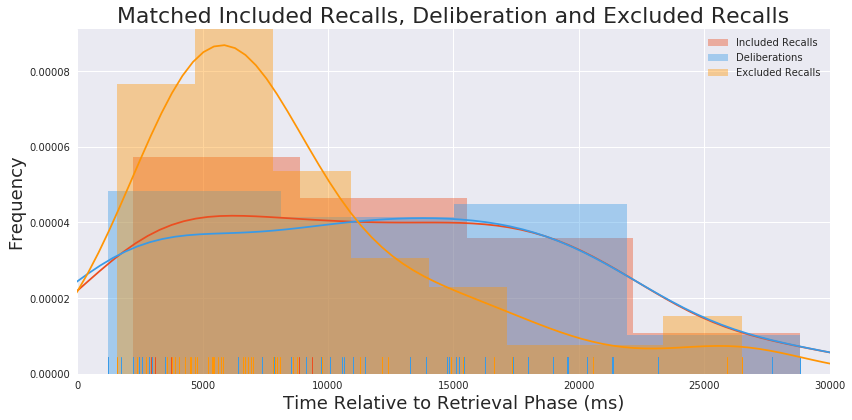

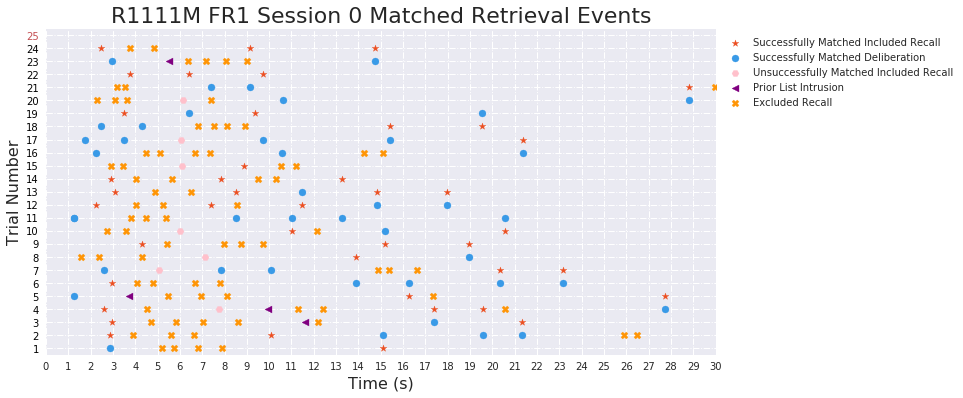

In [18]:
ram_subject.display_goodness_of_matching_info(plot_retrieval_period=True)

# 1) RetrievalEventCreator Rationale

### 1A). Functions for Adding Fields:
In developing the code, I found that it was incredibly useful to add in behavioral fields corresponding to the amount of time before and after an event to the event structure. I additionally think it's much more intuitive on a user-end, compare A and B below, I would argue that A is much nicer.

A). behavioral_events[behavioral_events['timebefore'] > 3000] 

B). behavioral_events[np.where(np.append(np.array([0]), np.diff(behavioral_events['mstime'])) > 3000)]

However, due to the way that certain events are structured (specifically having a dictionary as one of the types for the behavioral event's dtype) the numpy.lib.recfunctions.append_fields function will not work and will cause code to crash. CML_lib.Utility.NumpyFunctions has a utility function append_fields that serves as a workaround, enabling us to use indexing as seen in A.

### 1B). RetrievalEventCreator Rationale
In developing this code I've found that not all events are formatted the same and minor variations in event structure creation processes can lead to code crashing. Therefore, a function that simply takes in behavioral events without checking first that they are formatted correctly will not be capable of working across CML experiments, but rather will work primarily on the experiment it was tested on. 

In order to get around this issue I created an object RetrievalEventCreator which requires five inputs: the subject id, the experiment id, the session to examine, the time before each recall that must be free from other events, and the time after recall that must be free from other events. Additionally there is a sixth option argument verbose, which when set to True will print out the steps of the object.

#### The primary method use on created instances is initialize_recall_events. This method will set all the relevant attributes the object has while handling any discrepancy in events.  Example usage:

subject_instance = RetrievalEventCreator(subject,experiment,session,inclusion_time_before,inclusion_time_after)

subject_instance.initialize_recall_events() 

This method will handle any discrepancy in events and set all the relevant attributes the object has.

# 1). RetrievalEventCreator Explaination and Examples

In [19]:
# Function to print out attributes
def print_attributes(object_instance):
    """print out all the attributes an instance of on object has"""
    for k,v in enumerate(object_instance.__dict__):
        if type(object_instance.__dict__[v]) == np.recarray:
            print(str(k) + ': ' + v + ' (first two events only)', object_instance.__dict__[v][:2])
        else:
            print(str(k) + ': ' + v, object_instance.__dict__[v])
        print('')
    return

#### Ram usage

In [20]:
subject_fr = RetrievalEventCreator(subject='R1111M', experiment='FR1', session=2,
                                   inclusion_time_before=2000, inclusion_time_after=1000, verbose=True)
print_attributes(object_instance=subject_fr)

('0: inclusion_time_before', 2000)

('1: included_recalls', None)

('2: experiment', 'FR1')

('3: event_path', None)

('4: trials', None)

('5: rectime', 30000)

('6: mean_rec', None)

('7: possible_sessions', None)

('8: events', None)

('9: montage', None)

('10: session', 2)

('11: sample_rate', None)

('12: subject', 'R1111M')

('13: inclusion_time_after', 1000)

('14: verbose', True)



Initially we can see that that there are 13 attributes that belong to the instance and seven of them are set, six of which we passed as while as rectime an attribute corresponding to the time in seconds of the retrieval period. Once we call initialize_recall_events() all of these fields should have a value 

In [21]:
subject_fr.initialize_recall_events()
print('')
print_attributes(object_instance=subject_fr)

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 66.3333333333%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Set attribute included_recalls

('0: inclusion_time_before', 2000)

('1: included_recalls (first two events only)', rec.array([ (2, 213643, u'r1', 0, u'GLOVE', -999,  7121, [], 1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/2/ephys/current_processed/noreref/R1111M_FR1_2_26Jan16_1408', u'0.0', u'FR1', 1, 20, 0, 112, 1453836127023, 0, u'REC_WORD', u'1.05', 0, 2479, 2967),
           (2, 215127, u'r1', 0, u'SOCK', -999, 10088, [], 1, u'R1111M', u'/protocols/r1/subjects/R1111M/experiments/FR1/sessions/2/ephys/current_processed/noreref/R1111M_FR1_2_26Jan16_1408', u'0.0', u'FR1', 1, 20, 0, 238, 1453836129990, 0, u'REC_WORD', u'1.05', 1, 2967, 2325)], 
   

#### Scalp Lab ltpFR2 usage

In [22]:
# Create an instance
scalp_subject = RetrievalEventCreator(subject='LTP093', experiment='ltpFR2', session=3, 
                                      inclusion_time_after=2000, inclusion_time_before=2000, verbose=True)
# Initialize relevant attributes
# Notice that the code here needed to create REC_END events and adds them into scalp_subject.events
scalp_subject.initialize_recall_events()
print('')
print_attributes(object_instance=scalp_subject)

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 44.4444444444%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Could not find REC_END events, creating REC_END events
Warning, Only set valid mstime for REC_END events
Set attribute included_recalls

('0: inclusion_time_before', 2000)

('1: included_recalls (first two events only)', rec.array([ (u'ltp', 3, u'0.0', u'LTP093', u'HOOD',  6780, 20, 1410809608047, -1, u'REC_WORD', 547206, 0, u'ltpFR2', 24000, 0,  714, 0, 0, -999, -999, u'/protocols/ltp/subjects/LTP093/experiments/ltpFR2/sessions/3/ephys/current_processed/LTP093 20140915 1450.2.raw', 4, 20, 0, 2243, 6182),
           (u'ltp', 3, u'0.0', u'LTP093', u'ROD', 12962,  1, 1410809614229, -1, u'REC_WORD', 550297, 0, u'ltpFR2', 24000, 0, 1203, 0, 0, -999, -999, u'/protocols/ltp/subj

#### pyFR usage
Here we'll demo the code on two pyFR subjects, one without REC_START and REC_END events, and another without REC_END events. In the later case we'll set a non-sensical session value and see what the code does

In [23]:
missing_data_subject = RetrievalEventCreator(subject='BW022', experiment='pyFR', session=1, 
                                             inclusion_time_after=2000, inclusion_time_before=2000, verbose=True)
missing_data_subject.initialize_recall_events()

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 31.8518518519%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Could not find REC_END events, creating REC_END events
Warning, Only set valid mstime for REC_END events
Set attribute included_recalls


In [24]:
missing_more_data_subject = RetrievalEventCreator(subject='TJ001', experiment='pyFR', session=-9999, 
                                                  inclusion_time_after=2000, inclusion_time_before=5000, verbose=True)
missing_more_data_subject.initialize_recall_events()

DoneGoofed Session Error: Ah Shucks sorry to say but it looks like ya done goofed...
I could not find session -9999. Have you considered using a valid session instead? Try: 
[0 1 2]


DoneGoofed_InvalidSession: 

In [25]:
missing_more_data_subject = RetrievalEventCreator(subject='TJ001', experiment='pyFR', session=1, 
                                                  inclusion_time_after=2000, inclusion_time_before=5000, verbose=True)
missing_more_data_subject.initialize_recall_events()

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 31.6666666667%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Could not find REC_START events, creating REC_START events
Set attribute trials
Could not find REC_END events, creating REC_END events
Warning, Only set valid mstime for REC_END events
Set attribute included_recalls


So as we can see, if the user incorrectly puts in a session value then the code will inform the user of the possible valid sessions to enter

# 2). DeliberationEventCreator Example Usage
After creating an instance of DeliberationEventCreator, the user can simply call the method *create_matched_recarray()*, which will set an array of matched included recalls and their deliberations to the attribute *matched_events*, and return these events as an output of the function. 

The user can manually verify the code is correct by calling the method *display_goodness_of_matching_info()*. If the instance is created with verbose=True then the code will automatically run *display_goodness_of_matching_info()* after calling *create_matched_recarray()*

#### Ram FR1 example use

In [26]:
subject = 'R1313J'
experiment='FR1'
session = 1
rec_inclusion_before = 2000
rec_inclusion_after = 1000
remove_before_recall = 2000
remove_after_recall = 1500
recall_eeg_start = -1250
recall_eeg_end = 250
match_tolerance = 2000
desired_duration = None
verbose = True

ram_subject = DeliberationEventCreator(subject, experiment, session, 
                                          rec_inclusion_before, rec_inclusion_after, 
                                          recall_eeg_start, recall_eeg_end, match_tolerance,
                                          remove_before_recall, remove_after_recall,
                                          verbose=True)
# Create matched deliberation/recall events 
events = ram_subject.create_matched_recarray()
alternative_way_of_accessing_matched_events = ram_subject.matched_events

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 13.0952380952%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Set attribute included_recalls
('No recall period detected, trial: ', 15)
Starting Exact Matching Procedure...
Starting Tolerated Matching Procedure...
Set attribute matched_events


#### ltpFR2 example use

Set Attribute possible_sessions
Set attribute event_path
Set attribute events
Removing practice events
Adding field "match" to attribute events
Setting Attribute mean_rec
Mean Recall in session: 34.7222222222%
Added fields "timebefore" and "timeafter" to attribute events
Set attribute sample_rate
Set attribute trials
Could not find REC_END events, creating REC_END events
Warning, Only set valid mstime for REC_END events
Set attribute included_recalls
Starting Exact Matching Procedure...
Could not perfectly match recall index 0
Starting Tolerated Matching Procedure...
Set attribute matched_events






Determing Goodness of Fit...






('Kolmogorov-Smirnov statistic: ', Ks_2sampResult(statistic=0.050000000000000003, pvalue=0.99999999999999956))

Mean recall time (ms) = 17482.0
Mean deliberation time (ms) = 17517.15
Mean difference in time (ms) = -35.15
(len(retrieval_events) - len(matched_recs) - len(vocalizations)) == len(all_recalls):
(200, 201)
1). How many Recalls are excluded due 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Included Recalls,15792,19171,26136,5281,4432,28653,50093,14353,24196,27877,4479,13875,28553,32590,16722,10238,5795,7989,3875,9540
Deliberation,15792,19171,26136,5281,4432,28653,50093,14353,24196,27877,4479,13875,28553,32590,16722,10238,5795,7989,4578,9540


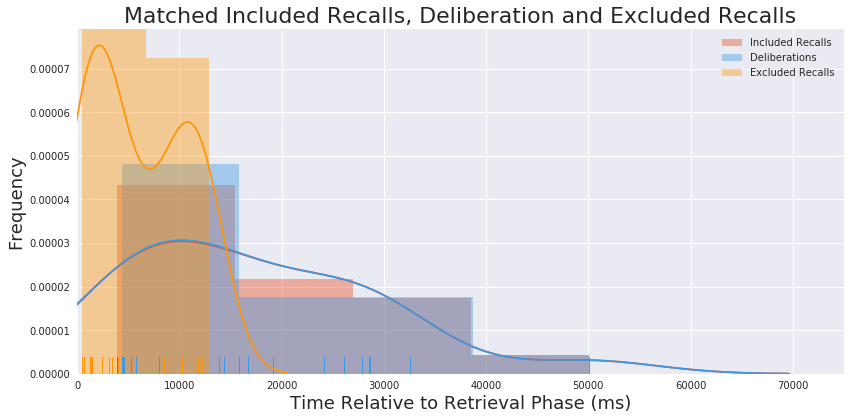

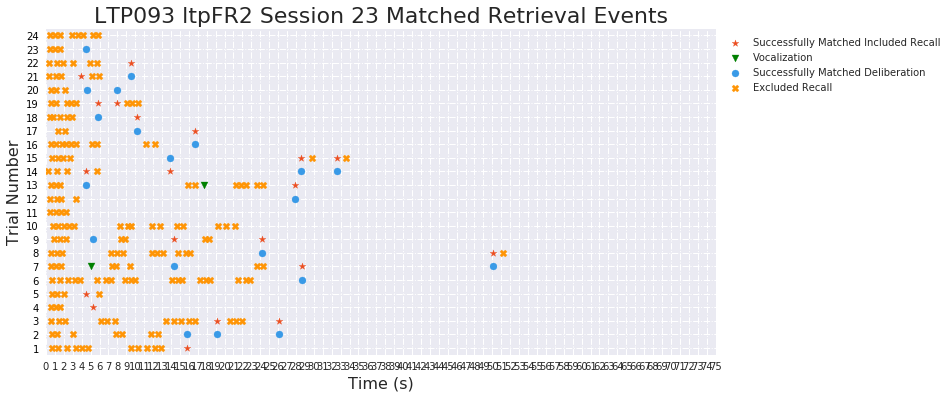

In [27]:
subject = 'LTP093'
experiment='ltpFR2'
session = 23
rec_inclusion_before = 2000
rec_inclusion_after = 1000
remove_before_recall = 2000
remove_after_recall = 1500
recall_eeg_start = -1250
recall_eeg_end = 250
match_tolerance = 2000
desired_duration = None
verbose = True

scalp_subject = DeliberationEventCreator(subject, experiment, session, 
                                          rec_inclusion_before, rec_inclusion_after, 
                                          recall_eeg_start, recall_eeg_end, match_tolerance,
                                          remove_before_recall, remove_after_recall,
                                          desired_duration=None, verbose=True)
# Create matched deliberation/recall events 
events = scalp_subject.create_matched_recarray()
scalp_subject.display_goodness_of_matching_info(plot_retrieval_period=True)